In [1]:
# Let's import all functions
import numpy as np
import scipy as sp
from qiskit import *
from qiskit.opflow import PauliTrotterEvolution, StateFn, PauliExpectation
from qiskit.opflow import CircuitSampler, PauliOp
from qiskit.opflow import I, X, Y, Z, Zero, One, Plus, Minus
from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator, Statevector, DensityMatrix
from scipy.linalg import expm
from qiskit.quantum_info import Statevector, partial_trace, Operator
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector

import matplotlib.pyplot as plt
import scipy.linalg as la

from sympy import Symbol, Matrix
import sympy as sp

np.set_printoptions(precision=3)
sim = Aer.get_backend('qasm_simulator')

In [2]:
H = np.array([[0, 0], [0, 1]])
H = H*(1j*np.pi/9)
exp_H = expm(H)

hamiltonian = (Z+X)^I
evo_time = Parameter('t')
evolution_op = (evo_time*hamiltonian).exp_i()
print(evolution_op) 

e^(-i*1.0*t * (
  1.0 * ZI
  + 1.0 * XI
))


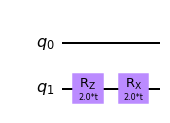

In [3]:
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evolution_op)
trotterized_op.to_circuit().decompose().decompose().draw("mpl")

In [69]:
hamiltonian2 = ((Z+I)/2)
evo_time = Parameter('t')
evolution_op = (evo_time*hamiltonian2).exp_i()^I
print(evolution_op) 

TensoredOp([
  e^(-i*1.0*t * (
    0.5 * Z
    + 0.5 * I
  )),
  I
])


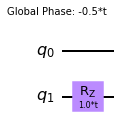

In [70]:
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evolution_op)
trotterized_op.to_circuit().decompose().decompose().draw("mpl")

# 1. Lab-9-quantum-simulation-as-a-search-algorithm

## Part 1: Hamiltonian Simulation

### 1.1 In circuit gate way e^H1 e^H2

In [4]:
def gate2matrix(gate):
    circ = QuantumCircuit(2)
    circ.append(gate, range(2))
    h_mat = Operator(circ).data
    mat = matrix(h_mat)
    return mat

In [5]:
# Create a quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

def get_state(qc):
    # Simulate the circuit and get the statevector
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    statevector = result.get_statevector()
    return statevector

# Print the statevector
print(get_state(qc))

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [137]:
h_mat = Operator(cc).data
mat = matrix(h_mat)
print(mat)

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]]


Statevector([0.707+0.j   , 0.664+0.242j, 0.   +0.j   , 0.   +0.j   ],
            dims=(2, 2))


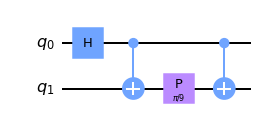

In [42]:
c = QuantumCircuit(2)
c.h(0)
c.cnot(0,1)
c.p(np.pi/9, 1)
c.cnot(0,1)

state = Statevector(c)
print(state)
c.draw("mpl")

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


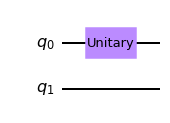

In [41]:
H = np.array([[0, 0], [0, 1]])
H = H*(-1j*np.pi/9)

# calculate the matrix exponential of H
exp_H = expm(H)

c2 = QuantumCircuit(2, name = 'H1')
# c2.h(0)
c2.unitary(exp_H, [0])
state = Statevector(c2)
print(state)
c2.draw("mpl")

In [10]:
# state = DensityMatrix(h1)
# plot_bloch_multivector(state)

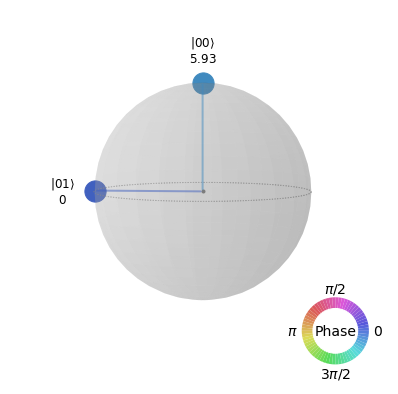

In [39]:
plot_state_qsphere(state, show_state_labels=True, show_state_phases = True)

In [85]:
state = Statevector(h1)
plot_bloch_multivector(state)
print(state)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


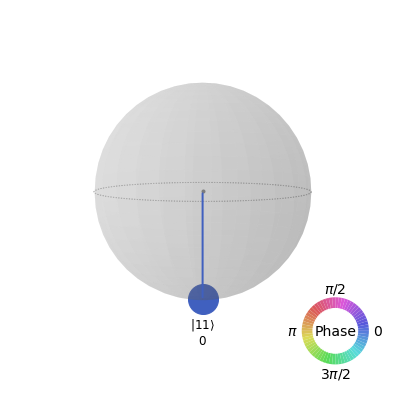

In [86]:
plot_state_qsphere(state, show_state_labels=True, show_state_phases = True)

In [154]:
print(get_state(h1))

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [113]:
print(gate2matrix(H1_gate))

[[1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j   ]
 [0.  +0.j    0.94+0.342j 0.  +0.j    0.  +0.j   ]
 [0.  +0.j    0.  +0.j    0.94+0.342j 0.  +0.j   ]
 [0.  +0.j    0.  +0.j    0.  +0.j    1.  +0.j   ]]


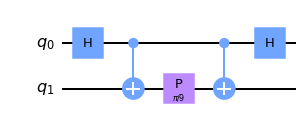

In [114]:
h2 = QuantumCircuit(2, name='H2')

#### Your code goes here ###


h2.h(0)
h2.cnot(0, 1)
h2.p(np.pi/9, 1)
h2.cnot(0, 1)
h2.h(0)


#############################

H2_gate = h2.to_gate()

h2.draw("mpl")

In [151]:
print(get_state(h2))

Statevector([ 0.97-0.171j, -0.03-0.171j,  0.  +0.j   ,  0.  +0.j   ],
            dims=(2, 2))


In [115]:
print(gate2matrix(H2_gate))

[[ 0.97+0.171j  0.03-0.171j  0.  +0.j     0.  +0.j   ]
 [ 0.03-0.171j  0.97+0.171j  0.  +0.j     0.  +0.j   ]
 [ 0.  +0.j     0.  +0.j     0.97+0.171j -0.03+0.171j]
 [ 0.  +0.j     0.  +0.j    -0.03+0.171j  0.97+0.171j]]


In [162]:
h = QuantumCircuit(2, name='H2')

#### Your code goes here ###
h.x(0)


#############################

H_gate = h.to_gate()

print(gate2matrix(H_gate))
print(get_state(h))

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [128]:
print(gate2matrix(H1_gate)*gate2matrix(H2_gate))

[[ 0.97 +0.171j  0.03 -0.171j  0.   +0.j     0.   +0.j   ]
 [ 0.087-0.15j   0.853+0.492j  0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.853+0.492j -0.087+0.15j ]
 [ 0.   +0.j     0.   +0.j    -0.03 +0.171j  0.97 +0.171j]]


In [116]:
def st_out(qc):
    out = Statevector.from_instruction(qc)
    out_red = partial_trace(out, [1])
    
    prob, st_all = la.eig(out_red.data)
    cond = (prob>0.99) & (prob<1.01)
    st = st_all[:, cond].ravel()
    print(st)
    return(st)
    
myst = []

circ = QuantumCircuit(2)
circ.h(0)
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(7):
    circ.append(H1_gate, range(2))
    circ.append(H2_gate, range(2))
    st = st_out(circ)
    myst.append(Statevector(st))
    
    
# OP out_red:
# DensityMatrix([[0.5+0.j, 0.5+0.j],
#                [0.5+0.j, 0.5+0.j]],
#               dims=(2,))
# DensityMatrix([[0.558+0.j   , 0.47 +0.161j],
#                [0.47 -0.161j, 0.442+0.j   ]],
#               dims=(2,))
# DensityMatrix([[0.662+0.j   , 0.387+0.273j],
#                [0.387-0.273j, 0.338+0.j   ]],
#               dims=(2,))
# DensityMatrix([[0.785+0.j  , 0.27 +0.31j],
#                [0.27 -0.31j, 0.215+0.j  ]],
#               dims=(2,))
# DensityMatrix([[0.899+0.j   , 0.148+0.263j],
#                [0.148-0.263j, 0.101+0.j   ]],
#               dims=(2,))
# DensityMatrix([[0.977+0.j   , 0.049+0.143j],
#                [0.049-0.143j, 0.023+0.j   ]],
#               dims=(2,))
# DensityMatrix([[ 9.996e-01+0.j   , -3.218e-03-0.021j],
#                [-3.218e-03+0.021j,  4.412e-04+0.j   ]],
#               dims=(2,))
# DensityMatrix([[0.962+0.j  , 0.004-0.19j],
#                [0.004+0.19j, 0.038+0.j  ]],
#               dims=(2,))

[0.707+0.j 0.707+0.j]
[0.747+0.j    0.629+0.215j]
[0.813+0.j    0.475+0.336j]
[0.886+0.j   0.305+0.35j]
[0.948+0.j    0.156+0.277j]
[0.988+0.j    0.049+0.145j]
[ 1.   +0.j    -0.003-0.021j]
[0.981+0.j    0.004-0.194j]


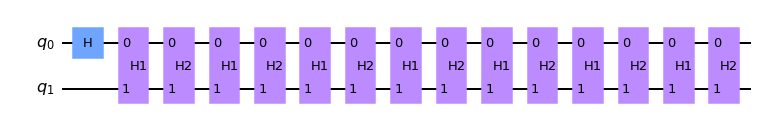

In [117]:
circ.draw("mpl")

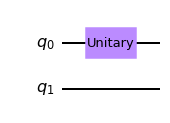

In [206]:
# Define the Hermitian matrix H
H = np.array([[1, 0], [0, 0]])
H = H*(-1j*np.pi/4)

# calculate the matrix exponential of H
exp_H = expm(H)

h1 = QuantumCircuit(2, name = 'H1')

h1.unitary(exp_H, [0])

H1_op = h1.to_gate()

h1.draw("mpl")

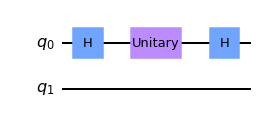

In [222]:
# Define the Hermitian matrix H
H = np.array([[1, 0], [0, 0]])
H = H*(-1j*np.pi/4)

# calculate the matrix exponential of H
exp_H = expm(H)

h2 = QuantumCircuit(2, name = 'H2')

h2.h(0)
h2.unitary(exp_H, [0])
h2.h(0)

H2_op = h2.to_gate()

h2.draw("mpl")

In [244]:
myst = []

circ = QuantumCircuit(2)
# circ.h(0)
myst.append(Statevector(circ))
for _ in range(20):
    circ.append(H2_op, range(2))
    myst.append(DensityMatrix(circ))
#     circ.append(H2_op, range(2))
#     myst.append(Statevector(circ))
    
print(myst)

[Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2)), DensityMatrix([[0.854+0.j   , 0.   +0.354j, 0.   +0.j   , 0.   +0.j   ],
               [0.   -0.354j, 0.146+0.j   , 0.   +0.j   , 0.   +0.j   ],
               [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
               [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ]],
              dims=(2, 2)), DensityMatrix([[0.5+0.j , 0. +0.5j, 0. +0.j , 0. +0.j ],
               [0. -0.5j, 0.5+0.j , 0. +0.j , 0. +0.j ],
               [0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ],
               [0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ]],
              dims=(2, 2)), DensityMatrix([[0.146+0.j   , 0.   +0.354j, 0.   +0.j   , 0.   +0.j   ],
               [0.   -0.354j, 0.854+0.j   , 0.   +0.j   , 0.   +0.j   ],
               [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
               [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ]],
              dims=(2, 2)), DensityMatrix([[-7.85e-17+0.

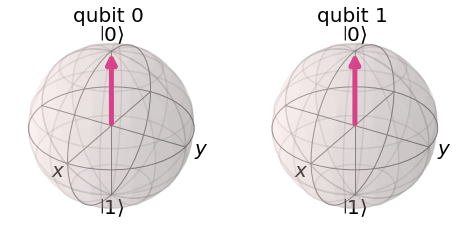

In [245]:
plot_bloch_multivector(myst[0])

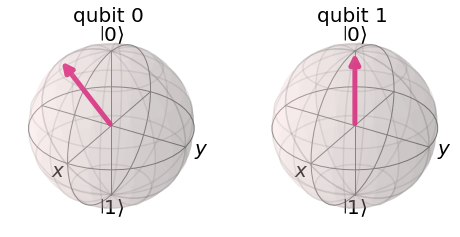

In [246]:
plot_bloch_multivector(myst[1])

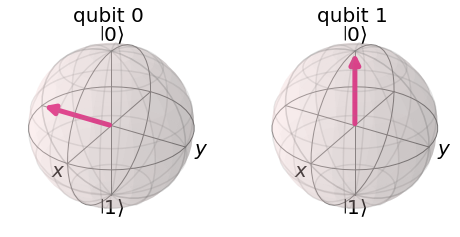

In [247]:
plot_bloch_multivector(myst[2])

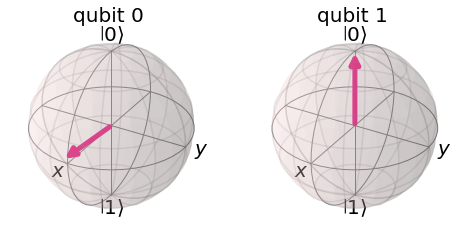

In [248]:
plot_bloch_multivector(myst[3])

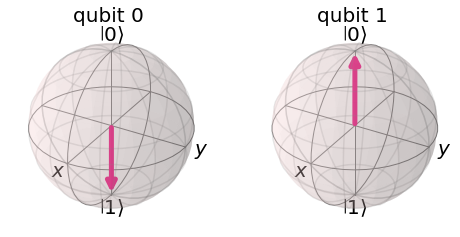

In [249]:
plot_bloch_multivector(myst[4])

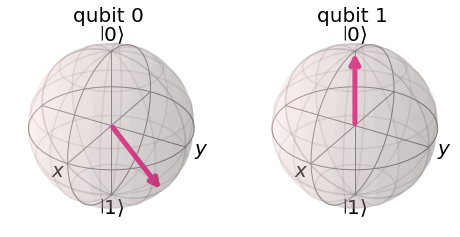

In [250]:
plot_bloch_multivector(myst[5])

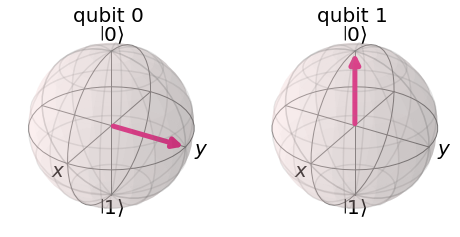

In [251]:
plot_bloch_multivector(myst[6])

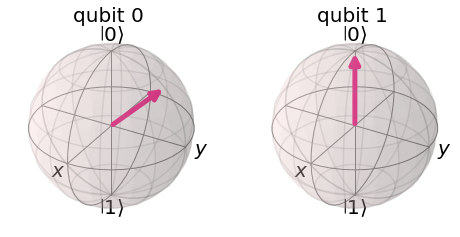

In [252]:
plot_bloch_multivector(myst[7])

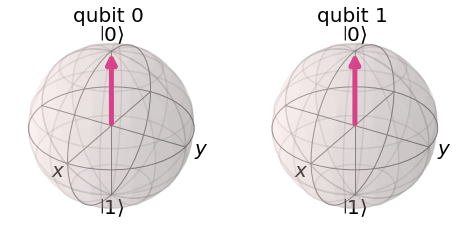

In [253]:
plot_bloch_multivector(myst[8])

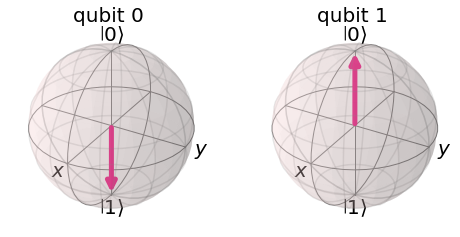

In [233]:
plot_bloch_multivector(myst[9])

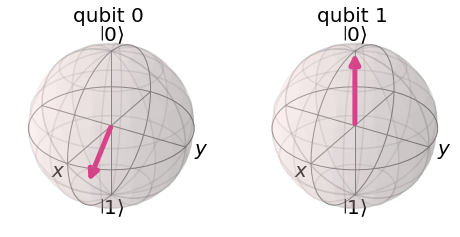

In [234]:
plot_bloch_multivector(myst[10])

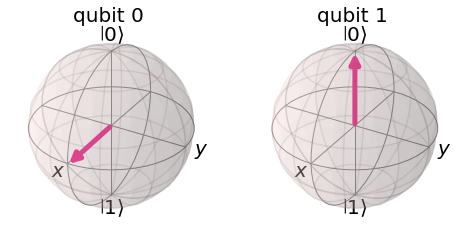

In [235]:
plot_bloch_multivector(myst[11])

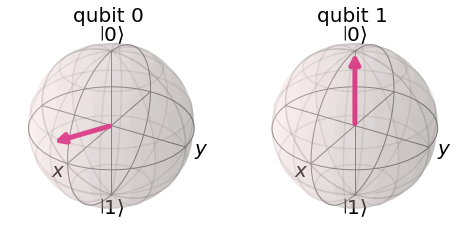

In [236]:
plot_bloch_multivector(myst[12])

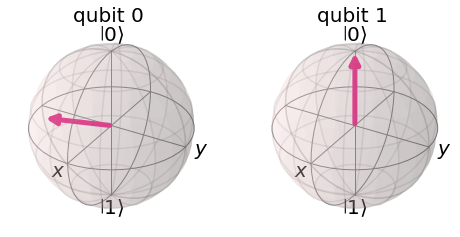

In [237]:
plot_bloch_multivector(myst[13])

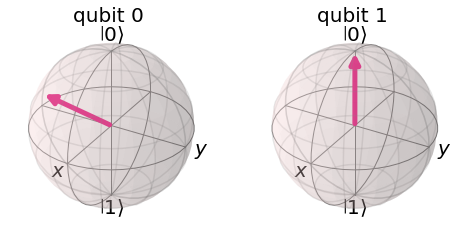

In [238]:
plot_bloch_multivector(myst[14])

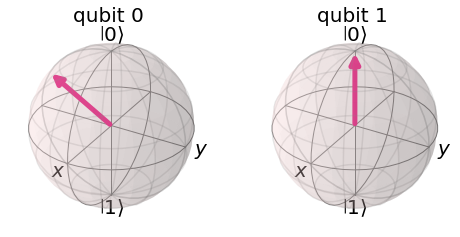

In [239]:
plot_bloch_multivector(myst[15])

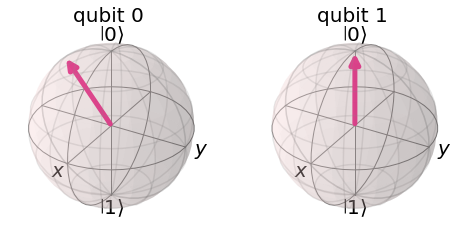

In [240]:
plot_bloch_multivector(myst[16])

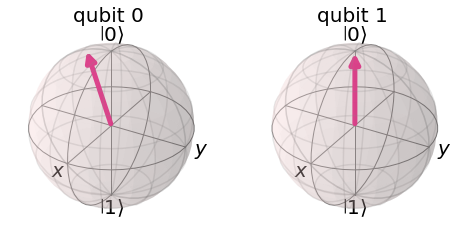

In [241]:
plot_bloch_multivector(myst[17])

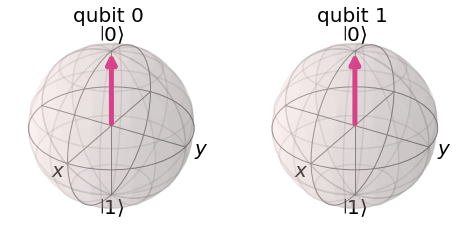

In [242]:
plot_bloch_multivector(myst[18])

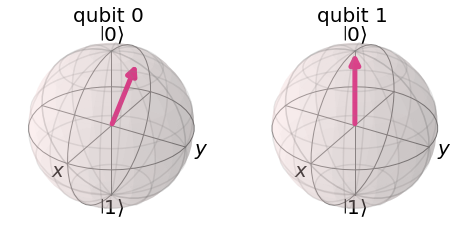

In [243]:
plot_bloch_multivector(myst[19])

## 1.2 In operator way e^H1 e^H2

In [167]:
def H1_op(delt):
    H = np.array([[0, 0], [0, 1]])
    H = H*(-1j*delt)

    # calculate the matrix exponential of H
    exp_H = expm(H)

    h1 = QuantumCircuit(2, name = 'H1')

    h1.unitary(exp_H, [0])

    return h1.to_gate()

In [169]:
def H2_op(delt):
    # Define the Hermitian matrix H
    H = np.array([[0, 0], [0, 1]])
    H = H*(-1j*delt)

    # calculate the matrix exponential of H
    exp_H = expm(H)

    h2 = QuantumCircuit(2, name = 'H2')

    h2.h(0)
    h2.unitary(exp_H, [0])
    h2.h(0)

    return h2.to_gate()

In [178]:
myst = []

circ = QuantumCircuit(2)
circ.h(0)
for _ in range(6):
    myst.append(Statevector(circ))
    circ.append(H1_op(np.pi/9), range(2))
    circ.append(H2_op(np.pi/9), range(2))
myst

[Statevector([0.707+0.j, 0.707+0.j, 0.   +0.j, 0.   +0.j],
             dims=(2, 2)),
 Statevector([0.747-0.015j, 0.624-0.227j, 0.   +0.j   , 0.   +0.j   ],
             dims=(2, 2)),
 Statevector([0.811-0.068j, 0.446-0.374j, 0.   +0.j   , 0.   +0.j   ],
             dims=(2, 2)),
 Statevector([0.869-0.17j , 0.232-0.402j, 0.   +0.j   , 0.   +0.j   ],
             dims=(2, 2)),
 Statevector([0.895-0.313j, 0.055-0.313j, 0.   +0.j   , 0.   +0.j   ],
             dims=(2, 2)),
 Statevector([ 0.866-0.476j, -0.027-0.151j,  0.   +0.j   ,  0.   +0.j   ],
             dims=(2, 2))]

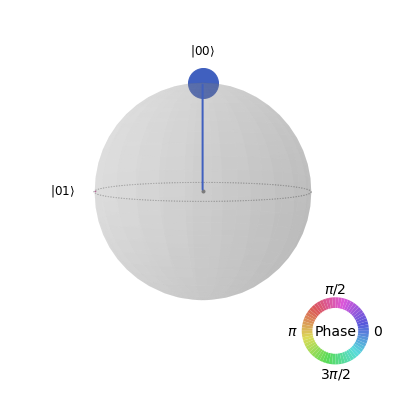

In [179]:
plot_state_qsphere(circ)

In [182]:
myst = []

circ = QuantumCircuit(2)
circ.h(0)

circ.append(H1_op(np.pi/2), range(2))
circ.append(H2_op(np.pi/2), range(2))

Statevector(circ)

Statevector([0.707-7.071e-01j, 0.   -1.665e-16j, 0.   +0.000e+00j,
             0.   +0.000e+00j],
            dims=(2, 2))


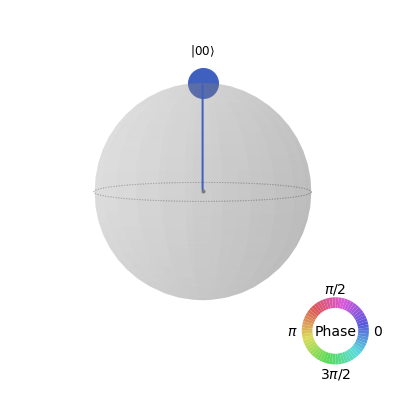

In [183]:
plot_state_qsphere(circ)

### |1><1| operator out_red.data

In [218]:
# [[0.5+0.j 0.5+0.j]
#  [0.5+0.j 0.5+0.j]]
# [[0.558+0.j    0.47 +0.161j]
#  [0.47 -0.161j 0.442+0.j   ]]
# [[0.662+0.j    0.387+0.273j]
#  [0.387-0.273j 0.338+0.j   ]]
# [[0.785+0.j   0.27 +0.31j]
#  [0.27 -0.31j 0.215+0.j  ]]
# [[0.899+0.j    0.148+0.263j]
#  [0.148-0.263j 0.101+0.j   ]]
# [[0.977+0.j    0.049+0.143j]
#  [0.049-0.143j 0.023+0.j   ]]
# [[ 9.996e-01+0.j    -3.218e-03-0.021j]
#  [-3.218e-03+0.021j  4.412e-04+0.j   ]]
# [[0.962+0.j   0.004-0.19j]
#  [0.004+0.19j 0.038+0.j  ]]

In [167]:
myst = []

circ = QuantumCircuit(2)
circ.h(0)
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(1):
    print("init state: " + str(get_state(circ)))
    circ.append(H1_gate, range(2))
    circ.append(H2_gate, range(2))
    print("gate: " + str(gate2matrix(circ)))
    print("final state: " + str(get_state(circ)))
    st = st_out(circ)
    myst.append(Statevector(st))
    
# myst

init state: Statevector([0.707+0.j, 0.707+0.j, 0.   +0.j, 0.   +0.j],
            dims=(2, 2))
gate: [[ 0.747+0.015j  0.624+0.227j  0.   +0.j     0.   +0.j   ]
 [ 0.624+0.227j -0.582-0.469j  0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.582+0.469j  0.624+0.227j]
 [ 0.   +0.j     0.   +0.j     0.624+0.227j -0.747-0.015j]]
final state: Statevector([0.747+0.015j, 0.624+0.227j, 0.   +0.j   , 0.   +0.j   ],
            dims=(2, 2))


In [168]:
myst = []

circ = QuantumCircuit(2)
circ.h(0)
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(1):
    print("init state: " + str(get_state(circ)))
    circ.append(H1_op, range(2))
    circ.append(H2_op, range(2))
    print("gate: " + str(gate2matrix(circ)))
    print("final state: " + str(get_state(circ)))
    st = st_out(circ)
    myst.append(Statevector(st))

init state: Statevector([0.707+0.j, 0.707+0.j, 0.   +0.j, 0.   +0.j],
            dims=(2, 2))
gate: [[ 0.582-0.469j  0.624-0.227j  0.   +0.j     0.   +0.j   ]
 [ 0.624-0.227j -0.747+0.015j  0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.582-0.469j  0.624-0.227j]
 [ 0.   +0.j     0.   +0.j     0.624-0.227j -0.747+0.015j]]
final state: Statevector([0.582-0.469j, 0.624-0.227j, 0.   +0.j   , 0.   +0.j   ],
            dims=(2, 2))


In [172]:
def st_out(qc):
    out = Statevector.from_instruction(qc)
    out_red = partial_trace(out, [1])
    prob, st_all = la.eig(out_red.data)
    cond = (prob>0.99) & (prob<1.01)
    st = st_all[:, cond].ravel()
    
    return(st)
    
myst = []

circ = QuantumCircuit(2)
circ.h(0)
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(7):
    circ.append(H1_op, range(2))
    circ.append(H2_op, range(2))
    myst.append(get_state(circ))
    
myst

[Statevector([0.707+0.j, 0.707+0.j],
             dims=(2,)),
 Statevector([0.582-0.469j, 0.624-0.227j, 0.   +0.j   , 0.   +0.j   ],
             dims=(2, 2)),
 Statevector([0.207-0.786j, 0.446-0.374j, 0.   +0.j   , 0.   +0.j   ],
             dims=(2, 2)),
 Statevector([-0.288-0.838j,  0.232-0.402j,  0.   +0.j   ,  0.   +0.j   ],
             dims=(2, 2)),
 Statevector([-0.734-0.6j  ,  0.055-0.313j,  0.   +0.j   ,  0.   +0.j   ],
             dims=(2, 2)),
 Statevector([-0.977-0.151j, -0.027-0.151j,  0.   +0.j   ,  0.   +0.j   ],
             dims=(2, 2)),
 Statevector([-0.932+0.361j,  0.011+0.018j,  0.   +0.j   ,  0.   +0.j   ],
             dims=(2, 2)),
 Statevector([-0.614+0.765j,  0.149+0.125j,  0.   +0.j   ,  0.   +0.j   ],
             dims=(2, 2))]

In [237]:
def st_out(qc):
    out = Statevector.from_instruction(qc)
    out_red = partial_trace(out, [1])
    print(out_red)
    prob, st_all = la.eig(out_red.data)
    cond = (prob>0.99) & (prob<1.01)
    st = st_all[:, cond].ravel()
    return(st)
    
myst = []

circ = QuantumCircuit(2)
circ.h(0)
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(7):
    circ.append(H1_gate, range(2))
    circ.append(H2_gate, range(2))
    myst.append(get_state(circ))
    
# myst

DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))


In [202]:
def st_out(qc):
    out = Statevector.from_instruction(qc)
    out_red = partial_trace(out, [1])
    prob, st_all = la.eig(out_red.data)
    cond = (prob>0.99) & (prob<1.01)
    st = st_all[:, cond].ravel()
    np.set_printoptions(precision=5)
    print(st_all[:, cond].ravel())
    return(st)
    
myst = []

circ = QuantumCircuit(2)
circ.h(0) 
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(7):
    circ.append(H1_gate, range(2))
    circ.append(H2_gate, range(2))
    st = st_out(circ)
    myst.append(Statevector(st))

[0.70711+0.j 0.70711+0.j]
[0.74732+0.j      0.62871+0.21503j]
[0.81337+0.j      0.47524+0.33552j]
[0.88586+0.j      0.30468+0.34989j]
[0.94803+0.j      0.15571+0.27747j]
[0.98819+0.j      0.04933+0.14504j]
[ 0.99978+0.j      -0.00322-0.02076j]
[0.98101+0.j     0.00415-0.1939j]


In [201]:
def st_out(qc):
    out = Statevector.from_instruction(qc)
    out_red = partial_trace(out, [1])
    prob, st_all = la.eig(out_red.data)
    cond = (prob>0.99) & (prob<1.01)
    st = st_all[:, cond].ravel()
    np.set_printoptions(precision=5)
    print(st_all[:, cond].ravel())
    return(st)
    
myst = []

circ = QuantumCircuit(2)
circ.h(0)
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(7):
    circ.append(H1_op, range(2))
    circ.append(H2_op, range(2))
    st = st_out(circ)
    myst.append(Statevector(st))
    
# myst

[0.70711+0.j 0.70711+0.j]
[0.74732+0.j      0.62871+0.21503j]
[0.81337+0.j      0.47524+0.33552j]
[0.88586+0.j      0.30468+0.34989j]
[0.94803+0.j      0.15571+0.27747j]
[0.98819+0.j      0.04933+0.14504j]
[ 0.99978+0.j      -0.00322-0.02076j]
[0.98101+0.j     0.00415-0.1939j]


**out_red.data (density matrix)**: <br />
[[0.5+0.j 0.5+0.j] <br />
 [0.5+0.j 0.5+0.j]]<br />
 ...<br />
 [[0.962+0.j   0.004+0.19j]<br />
 [0.004-0.19j 0.038+0.j  ]]<br />
 
**prob (eigenvalues of density matrix)**:<br />
[ 1.000e+00+0.j -8.716e-33+0.j] <br />
... <br />
[1.000e+00-1.485e-18j 1.361e-17+1.485e-18j] <br />

**st_all (eigenvectors of density matrix)**:<br />
[[ 0.707+0.j  0.707+0.j]<br />
 [ 0.707+0.j -0.707+0.j]]<br />
...<br />
[[ 0.981+0.j    -0.004-0.194j]<br />
 [ 0.004-0.194j  0.981+0.j   ]]<br />
 
 **st_all[:, cond].ravel()**:<br />
 [0.707+0.j 0.707+0.j]:<br />
 ...:<br />
 [0.981+0.j    0.004-0.194j]:<br />

## 1.2 Use e^-i(H1+H2)

In [245]:
# Define the Hermitian matrix H |0><0|
H1 = np.array([[1, 0], [0, 0]])

H2 = np.array([[1/2, 1/2], [1/2, 1/2]])

H = H1+H2

H = H*(-1j*np.pi/9)

# calculate the matrix exponential of H
exp_H = expm(H)

h1 = QuantumCircuit(2, name = 'H1')

h1.unitary(exp_H, [0])

H1 = h1.to_gate()

# h1.draw("mpl")
print(H1)
print(H2)
print(H)

Instruction(name='H1', num_qubits=2, num_clbits=0, params=[])
[[0.5 0.5]
 [0.5 0.5]]
[[0.-0.524j 0.-0.175j]
 [0.-0.175j 0.-0.175j]]


In [247]:
from qiskit.quantum_info import Statevector, partial_trace

def st_out(qc):
    out = Statevector.from_instruction(qc)
    out_red = partial_trace(out, [1])
    prob, st_all = la.eig(out_red.data)
    cond = (prob>0.99) & (prob<1.01)
    st = st_all[:, cond].ravel()
    print(st)
    return(st)
    
myst = []

circ = QuantumCircuit(2)
circ.h(0)
st = st_out(circ)
myst.append(Statevector(st))

for _ in range(7):
    circ.append(H1, range(2))
    st = st_out(circ)
    myst.append(st)
    
# myst

[0.707+0.j 0.707+0.j]
[0.728+0.j   0.646+0.23j]
[0.782+0.j    0.496+0.377j]
[0.853+0.j    0.319+0.413j]
[0.921+0.j    0.165+0.353j]
[0.972+0.j    0.056+0.227j]
[0.998+0.j    0.004+0.063j]
[0.994+0.j   0.012-0.11j]


## Part 2: Quantum Search as a Quantum Simulation

In [11]:
n = 5
qc = QuantumCircuit(n+1, name='Oracle')
qc.mct(list(range(n)), n) #multiple cnot gates
Oracle = qc.to_gate()

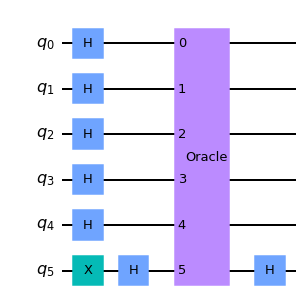

In [12]:
test = QuantumCircuit(n+1)
test.x(n)
test.h(range(n+1))
test.append(Oracle, range(n+1))
test.h(n)

test.draw("mpl")

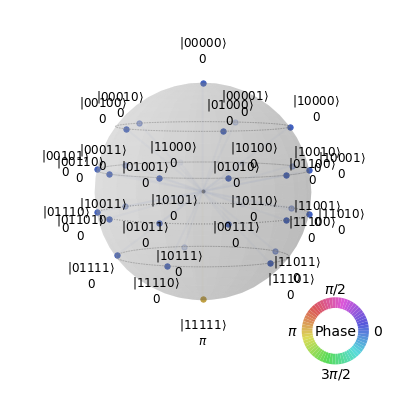

In [13]:
st = Statevector.from_instruction(test)
st_red = partial_trace(st, [n])

plot_state_qsphere(st_red,show_state_phases = True)

In [129]:
qc = QuantumCircuit(n+1, name='Oracle')
qc.mct(list(range(n)), n)

Oracle = qc.to_gate()

In [59]:
def uniform_matrix(n):
    N = 2**n
    v = np.ones((N,1))*(1/np.sqrt(N))
    m = np.matmul(v, v.T.conj())
    return m

In [127]:
# def H1_op(delt, n):
#     h1 = QuantumCircuit(n, name='H1')
#     H = uniform_matrix(n)
#     H = H*(-1j*delt)
#     exp_H = expm(H)
#     h1.unitary(exp_H, range(n))
#     return h1.to_gate()

In [201]:
for i in range(n):
    print(i)

0


In [314]:
def H1_op(delt, n):
    N = 2**n
    h1 = QuantumCircuit(n+1, name='H1')
    H= np.zeros((N,N))
    H[N-1][N-1] = 1
    H = H*(-1j*delt)
    exp_H = expm(H)
    h1.unitary(exp_H, range(n))
    return h1.to_gate()

In [315]:
def H2_op(delt, n):
    N = 2**n
    h2 = QuantumCircuit(n+1, name='H2')
    H = uniform_matrix(n)
    H = H*(-1j*delt)
    exp_H = expm(H)
    h2.unitary(exp_H, range(n))
    return h2.to_gate()

In [316]:
def H_op(delt, n):
    N = 2**n
    h1 = QuantumCircuit(n+1, name='H1')
    H= np.zeros((N,N))
    H[N-1][N-1] = 1
    H = H + uniform_matrix(n)
    H = H*(-1j*delt)
    exp_H = expm(H)
    h1.unitary(exp_H, range(n))
    return h1.to_gate()

In [249]:
def st_out(qc):
    out = Statevector.from_instruction(qc)
    out_red = partial_trace(out, [1])
    prob, st_all = la.eig(out_red.data)
    cond = (prob>0.99) & (prob<1.01)
    st = st_all[:, cond].ravel()
    np.set_printoptions(precision=5)
    return Statevector(st)

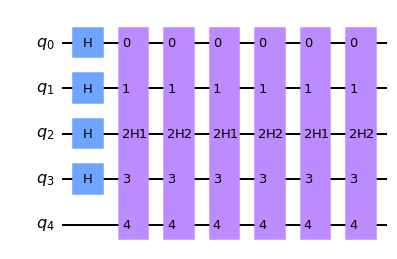

In [372]:
n = 4
states = []
sim_h = QuantumCircuit(n+1)
sim_h.h(range(n))

alpha = 1/np.sqrt(2**n)
# states.append(Statevector(sim_h))
# sim_h.append(H1_op(np.pi/(2*alpha),n), range(n+1))
# sim_h.append(H2_op(np.pi/(2*alpha),n), range(n+1))

r = (int)(np.pi*np.sqrt(2**n)/4)
for _ in range(r):
    states.append(Statevector(sim_h))
    sim_h.append(H1_op(np.pi,n), range(n+1))
    sim_h.append(H2_op(np.pi,n), range(n+1))
    states.append(Statevector(sim_h))

sim_h.draw("mpl")

In [357]:
# print(states)

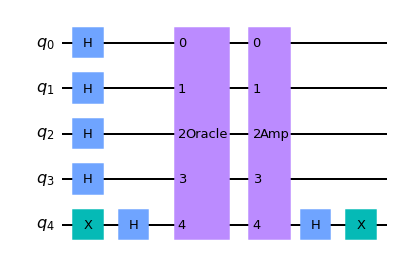

In [369]:
qc = QuantumCircuit(n+1, name='Oracle')
qc.mct(list(range(n)), n)

Oracle = qc.to_gate()

qc = QuantumCircuit(n+1, name='Amp')
qc.h(range(n))
qc.x(range(n))
qc.mct(list(range(n)), n)
qc.x(range(n))
qc.h(range(n))

Amp = qc.to_gate()

grover = QuantumCircuit(n+1)
grover.x(n)
grover.h(range(n+1))
grover.append(Oracle, range(n+1))
grover.append(Amp, range(n+1))
grover.h(n)
grover.x(n)

grover.draw("mpl")

In [375]:
st_simh = Statevector.from_instruction(sim_h)
st_grover = Statevector.from_instruction(grover)
print(st_simh)
print(st_grover)
print('grover circuit and sim_h circuit genrate the same output state: ' ,st_simh == st_grover)

Statevector([ 0.05078+1.17363e-17j,  0.05078+5.07675e-17j,
              0.05078+8.06915e-17j,  0.05078+5.33696e-17j,
              0.05078+2.99508e-17j,  0.05078+6.11759e-17j,
              0.05078+8.71967e-17j,  0.05078+6.11759e-17j,
              0.05078+4.49128e-17j,  0.05078+6.96326e-17j,
              0.05078+5.59717e-17j,  0.05078+8.29683e-17j,
              0.05078+8.26431e-17j,  0.05078+7.92278e-17j,
              0.05078+1.02728e-16j, -0.98047+3.33256e-16j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j,
              0.     +0.00000e+00j,  0.     +0.00000e+00j],
            dims=(2, 2, 2, 2, 2))
Statevector([-0.1875+

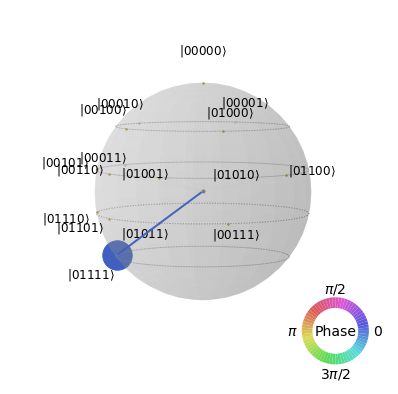

In [376]:
plot_state_qsphere(st_simh)

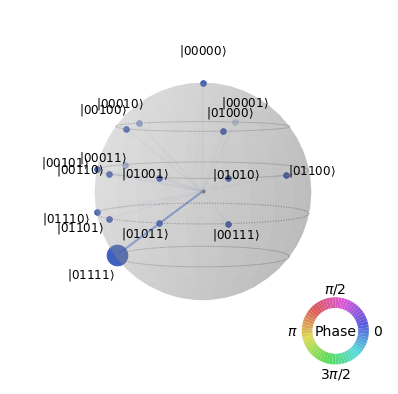

In [374]:
plot_state_qsphere(st_grover)